# Part 2. Deep Learning Frameworks

Before we go into deep learning modelling, we will first need to have a quick familiarisation with a deep learning framework. We recommend __[Keras](https://keras.io)__, which is built on top of Tensorflow, but alternatively, you can consider __[PyTorch](https://pytorch.org)__. Resources are abundant online on how to use them, but here are some official guides to get you started:
- PyTorch has a [60 Minute Blitz Guide](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)
- Tensorflow has an [Intro to Keras guide](https://www.tensorflow.org/guide/keras)

A few words on the difference between Keras and PyTorch - Keras is a high level wrapper on top of Google's Tensorflow, the most popular deep learning framework out there. Being more low level, Tensorflow faces many issues and troubles, which are addressed by the abstractions of Keras, making it a great way to start. Facebook's PyTorch on the other hand is a newcomer which has received massive interest in recent years, and is playing catch up to Tensorflow/Keras.

If you are more interested in how deep learning software has evolved since the days of Caffe and Theano as well as more in depth into what is happening in the software behind the scenes, we also recommend a [full lecture from Stanford](https://www.youtube.com/watch?v=6SlgtELqOWc) on this topic, although this is extra knowledge that isn't fully critical to this week.

Base on the tutorials you go through, you should be ready to build a 2 (or more) layer Multi-Level Perceptron (MLP) with deep learning. With the dataset you have prepared your machine learning model in the previous section, run your data through a MLP model with `Dense` (`Linear`) layers instead. Do some slight model adjustments, and discuss what kind of adjustments lead to improvements in score.

## Keras

In [1]:
#For reproducibility
import numpy as np
import tensorflow as tf
import random
import os

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(5242)
random.seed(5242)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
tf.set_random_seed(5242)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

C:\Users\LENOVO\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

train_val = np.concatenate([batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']],axis=0)
train_val_labels = batch1[b'labels']+batch2[b'labels']+batch3[b'labels']+batch4[b'labels']+batch5[b'labels']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_val, train_val_labels, test_size=0.2, random_state=42)

testset = unpickle('cifar-10-batches-py/test_batch')
x_test = testset[b'data']
y_test = testset[b'labels']

x_train = (x_train/255).astype('float32')
x_val = (x_val/255).astype('float32')
x_test = (x_test/255).astype('float32')

## 1. Data transformations/preprocessing

Most neural networks expect the images of a fixed size. Therefore, you will need to write some prepocessing code. At the basic level, you will need to normalise the data. Use the appropriate data generator/loader methods to encapsulate your data for training purposes. Do the same for both the train and test (and val, if exist) sets.

In [3]:
from keras.utils import to_categorical

# def generator(X_data, y_data, batch_size):

#     samples_per_epoch = X_data.shape[0]
#     number_of_batches = samples_per_epoch/batch_size
#     counter=0

#     while 1:
#         y_data = to_categorical(y_data,10,'float32')
#         X_data = X_data/255
#         X_batch = np.array(X_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
#         y_batch = np.array(y_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
#         counter += 1
#         yield X_batch,y_batch

#     #restart counter to yield data in the next epoch as well
#     if counter <= number_of_batches:
#         counter = 0

y_train = to_categorical(y_train,10,'float32')
y_val = to_categorical(y_val,10,'float32')
y_test = to_categorical(y_test,10,'float32')

## 2.  Build multi-layer perceptron neural network models with Keras 

The Keras Python library for deep learning focuses on the creation of models as a sequence of layers.

In here, you will discover the simple components that you can use to create neural networks and simple deep learning models using Keras.

In [4]:
from keras.models import Sequential
from keras.layers import Activation,Dense

Initializer = 'he_normal'
activation = Activation('relu')

model1 = Sequential()

model1.add(Dense(2056,kernel_initializer=Initializer,input_dim=3072))
model1.add(activation)

model1.add(Dense(10,kernel_initializer=Initializer))
model1.add(Activation('softmax'))

## 3. Train the MLP network in CIFAR-10

The main objective is to train the MLP network to achieve a balance between the ability to respond correctly to the input patterns that are used for training and the ability to provide good response to the input that is similar. Use the stochastic gradient descent optimiser with an appropriate learning rate between 1e-2 and 1e-3. Report your evaluation loss and accuracy, and you can also consider doing things like early stopping to prevent overfitting and achieve the best model.

In [5]:
from keras import metrics
from keras.optimizers import SGD

sgd = SGD(lr=0.01, decay=5e-4, momentum=0.9, nesterov=True)

model1.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics = ['accuracy'])

In [6]:
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

#early stopping
early_stop = EarlyStopping(monitor= 'val_acc', min_delta = 0.0001, patience=5, mode='max')

#model_fit
# batch_size = 32
# modelfit = model1.fit_generator(
#         generator(x_train,y_train,batch_size),
#         epochs=20,
#         steps_per_epoch = x_train.shape[0]/batch_size,
#         verbose=1,
#         validation_data = generator(x_val,y_val,batch_size),
#         validation_steps = x_val.shape[0]/batch_size,
#         callbacks=[early_stop] 
#         )

modelfit = model1.fit(
        x_train,
        y_train,
        batch_size=64,
        epochs=30,
        verbose=1,
        validation_data = (x_val,y_val)
        ,callbacks=[early_stop] 
        )

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 99s 2ms/step - loss: 1.7656 - acc: 0.3741 - val_loss: 1.6172 - val_acc: 0.4336
Epoch 2/30
40000/40000 [==============================] - 97s 2ms/step - loss: 1.5774 - acc: 0.4444 - val_loss: 1.5732 - val_acc: 0.4395
Epoch 3/30
40000/40000 [==============================] - 96s 2ms/step - loss: 1.4907 - acc: 0.4777 - val_loss: 1.5281 - val_acc: 0.4587
Epoch 4/30
40000/40000 [==============================] - 99s 2ms/step - loss: 1.4263 - acc: 0.4973 - val_loss: 1.4723 - val_acc: 0.4786
Epoch 5/30
40000/40000 [==============================] - 90s 2ms/step - loss: 1.3751 - acc: 0.5202 - val_loss: 1.4539 - val_acc: 0.4899
Epoch 6/30
40000/40000 [==============================] - 96s 2ms/step - loss: 1.3305 - acc: 0.5372 - val_loss: 1.4145 - val_acc: 0.5014
Epoch 7/30
40000/40000 [==============================] - 96s 2ms/step - loss: 1.2951 - acc: 0.5481 - val_loss: 1.4070 - val_acc

In [8]:
#model1.save('mlp/mlp_best.h5')
eval1 = model1.evaluate(x_test,y_test)
eval1

10000/10000 [==============================] - 7s 708us/step


[1.3100828203201293, 0.5457]

In [8]:
import pandas as pd
trainloss = pd.DataFrame(modelfit.history['loss'])
trainacc = pd.DataFrame(modelfit.history['acc'])
valloss = pd.DataFrame(modelfit.history['val_loss'])
valacc = pd.DataFrame(modelfit.history['val_acc'])

summary = pd.concat([trainloss,trainacc,valloss,valacc],axis=1)
summary.columns = ["train loss","train acc","val loss","val acc"]
summary.to_csv("mlp/mlp_1024_pred5381_loss131825.csv",index = False, header= True)

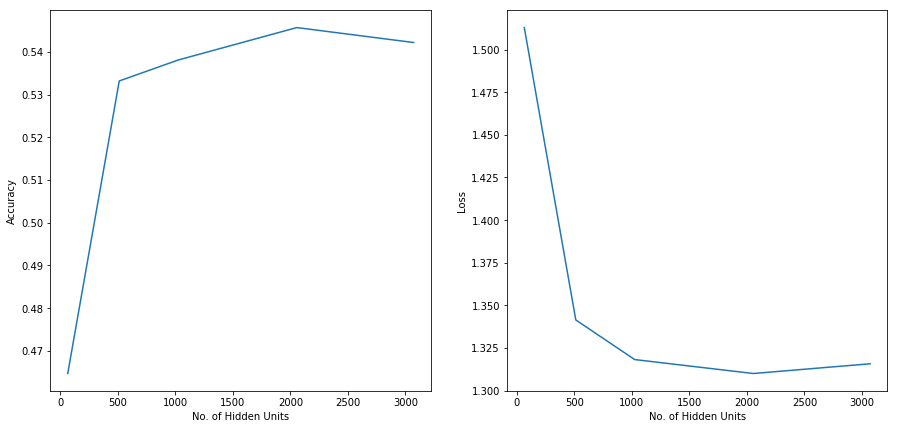

In [26]:
sum1 = pd.DataFrame([[0.4647,0.5332,0.5381,0.5457,0.5422],[1.51286,1.34147,1.31825,1.31008,1.31579]]).T
sum1.index = [64,512,1024,2056,3072]
sum1.columns = ['Accuracy','Loss']
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].plot(sum1.index,sum1['Accuracy'])
x_axis = ax[0].set_xlabel('No. of Hidden Units')
y_axis = ax[0].set_ylabel('Accuracy')

ax[1].plot(sum1.index,sum1['Loss'])
x_axis = ax[1].set_xlabel('No. of Hidden Units')
y_axis = ax[1].set_ylabel('Loss')

plt.show()

<span style="color:#003366"><b> The universal approximation theorem states that a feed-forward neural network model with a single hidden layer can learn all sorts of complex patterns as long as there is sufficient hidden units and it is trained long enough with optimized parameters. Testing the universal approximation theorem with a simple MLP model using 2 layers, test performance improves with the number of units in the hidden layer until 2056 units. As the number of hidden units increase beyond that, the model complexity increases and high model variance tend to dominate the mdoel performance(overfitting). 

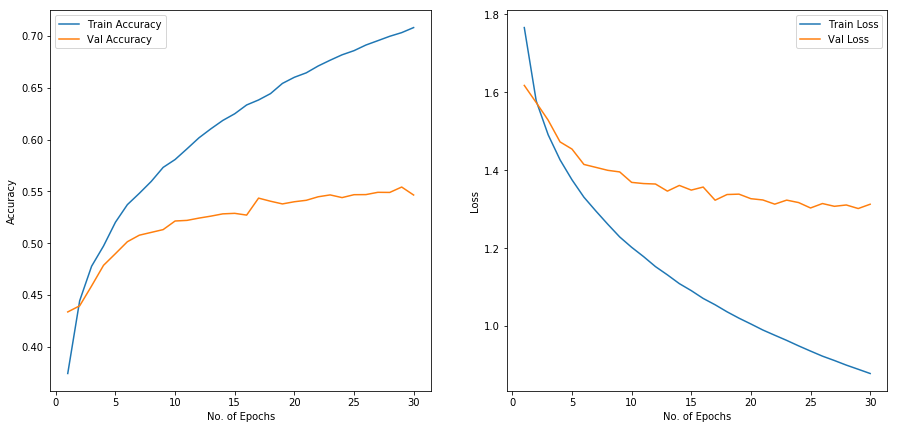

In [2]:
import pandas as pd
mlp2056 = pd.read_csv('mlp/mlp_2056_pred5457_loss131008.csv')

import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].plot(mlp2056.index+1,mlp2056['train acc'],label='Train Accuracy')
ax[0].plot(mlp2056.index+1,mlp2056['val acc'],label='Val Accuracy')
x_axis = ax[0].set_xlabel('No. of Epochs')
y_axis = ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(mlp2056.index+1,mlp2056['train loss'],label='Train Loss')
ax[1].plot(mlp2056.index+1,mlp2056['val loss'],label='Val Loss')
x_axis = ax[1].set_xlabel('No. of Epochs')
y_axis = ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

<span style="color:#003366"><b> Overfitting is clear in the best MLP model (2056 hidden units) with a stagnating val accuracy and loss and continually increasing train accuracy and decreasing train loss. Early stopping was used to stop model training if model performance fails to improve after a few epochs, preventing performance degradation due to training overfitted weights. Other regularization methods (L2 regularization, dropout layers, data augmentation) will be used in the CNN model in part 4 to reduce this overfitting.

In [10]:
import pandas as pd
from keras.models import load_model
model1b = load_model('mlp/mlp_best.h5')

pred = model1b.predict(x_test).argmax(axis=1)
pd.DataFrame(pred).to_csv('mlp/pred.csv',index=False)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Average Accuracy: ',accuracy_score(testset[b'labels'],pred))
print()

Average Accuracy:  0.5457



In [14]:
cm = confusion_matrix(testset[b'labels'], pred)
pd.DataFrame(cm.diagonal()/[np.sum(np.array(testset[b'labels'])==i) for i in list(range(10))]*100,columns = ['Accuracy'])

,Accuracy
0,58.3
1,69.0
2,44.3
3,39.7
4,48.2
5,45.5
6,54.5
7,61.3
8,69.7
9,55.2


## PyTorch

In [1]:
import torch
import torch.utils.data as utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.set_num_threads(1)

In [2]:
import numpy as np
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

train_val = np.concatenate([batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']],axis=0)
train_val_labels = batch1[b'labels']+batch2[b'labels']+batch3[b'labels']+batch4[b'labels']+batch5[b'labels']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_val, train_val_labels, test_size=0.2, random_state=42)

testset = unpickle('cifar-10-batches-py/test_batch')
x_test = testset[b'data']
y_test = testset[b'labels']

x_train = (x_train/255).astype('float32')
x_val = (x_val/255).astype('float32')
x_test = (x_test/255).astype('float32')

In [3]:
y_test= np.array(y_test)
y_val = np.array(y_val)
y_train = np.array(y_train)

tensor_xtrain = torch.stack([torch.Tensor(i) for i in x_train]) # transform to torch tensors
tensor_ytrain = torch.LongTensor(y_train)
tensor_xval = torch.stack([torch.Tensor(i) for i in x_val]) # transform to torch tensors
tensor_yval = torch.LongTensor(y_val)
tensor_xtest = torch.stack([torch.Tensor(i) for i in x_test]) # transform to torch tensors
tensor_ytest = torch.LongTensor(y_test)

trainset = utils.TensorDataset(tensor_xtrain,tensor_ytrain)
valset = utils.TensorDataset(tensor_xval,tensor_yval)
testset = utils.TensorDataset(tensor_xtest,tensor_ytest)

In [4]:
batch_size =64

train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
validation_loader = torch.utils.data.DataLoader(valset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

data_loaders = {"train": train_loader, "val": validation_loader}
data_lengths = {"train": x_train.shape[0]/batch_size, "val": x_val.shape[0]/batch_size}

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 2056)
        self.fc2 = nn.Linear(2056, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

In [9]:
n_epochs=30
lrate = 0.01
patience = 5

criterion = nn.CrossEntropyLoss()
early_stop = [np.Inf]*5
train_loss,val_loss = [], []

early_stop = [np.Inf]*patience
for epoch in range(n_epochs):  # loop over the dataset multiple times
    print('Epoch {}/{}'.format(epoch+1, n_epochs))
    print('-' * 10)
    if epoch !=0 and epoch%5 == 0: lrate = lrate*0.5 # learning rate schedule    
    #lrate = lrate/(1+(5e-4*(epoch+1)*625))
    
    for phase in ['train', 'val']:
        if phase == 'train':
            optimizer = optim.SGD(net.parameters(), lr=lrate,weight_decay=0,momentum=0.9,nesterov=True)
            #optimizer = optim.Adam(net.parameters(), lr=lrate, betas=(0.9, 0.999), eps=1e-08, weight_decay=5e-4)
            net.train(True)  # Set model to training mode
        else:
            net.train(False)    
    
        running_loss = 0.0
        
        for data in data_loaders[phase]:#iteration loop for each minibatch
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients to accumulate again using loss.backward() in every iteration
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs) # forward
            loss = criterion(outputs, labels) #get loss 
            
            if phase == 'train':
                loss.backward() #backpropagation
                optimizer.step()  #update parameters

            # print statistics
            running_loss += loss.item()
        
        
        epoch_loss = running_loss / data_lengths[phase]
        print('{} Loss: {:.4f}'.format(phase, epoch_loss))
        if phase == 'train': train_loss.append(epoch_loss)
        if phase == 'val': val_loss.append(epoch_loss)
        
    print()
          
    if phase == 'val': #early stopping block        
        if len(early_stop) == patience: del early_stop[0]        
        early_stop.append(running_loss)
        if min(early_stop) == early_stop[0] : break      

print('\nFinished Training')

Epoch 1/30
----------
train Loss: 1.5686
val Loss: 1.5909

Epoch 2/30
----------
train Loss: 1.5209
val Loss: 1.5716

Epoch 3/30
----------
train Loss: 1.4813
val Loss: 1.5442

Epoch 4/30
----------
train Loss: 1.4496
val Loss: 1.5215

Epoch 5/30
----------
train Loss: 1.4238
val Loss: 1.4820

Epoch 6/30
----------
train Loss: 1.3271
val Loss: 1.4094

Epoch 7/30
----------
train Loss: 1.2958
val Loss: 1.4115

Epoch 8/30
----------
train Loss: 1.2716
val Loss: 1.4050

Epoch 9/30
----------
train Loss: 1.2470
val Loss: 1.3978

Epoch 10/30
----------
train Loss: 1.2298
val Loss: 1.4162

Epoch 11/30
----------
train Loss: 1.1579
val Loss: 1.3748

Epoch 12/30
----------
train Loss: 1.1356
val Loss: 1.3591

Epoch 13/30
----------
train Loss: 1.1202
val Loss: 1.3480

Epoch 14/30
----------
train Loss: 1.1074
val Loss: 1.3717

Epoch 15/30
----------
train Loss: 1.0925
val Loss: 1.3498

Epoch 16/30
----------
train Loss: 1.0461
val Loss: 1.3420

Epoch 17/30
----------
train Loss: 1.0359
val Los

In [10]:
correct = 0
total = 0
pred = []
with torch.no_grad(): #temporarily set all the requires_grad flag to false.
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pred.append(predicted)

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))
print('Loss of the network on the 10000 test images: %.2f' % (criterion(outputs, labels)))

Accuracy of the network on the 10000 test images: 54.65 %
Loss of the network on the 10000 test images: 1.14


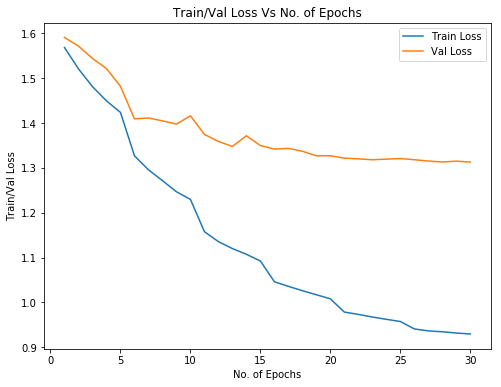

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(list(range(1,len(train_loss)+1)),train_loss,label='Train Loss')
plt.plot(list(range(1,len(val_loss)+1)),val_loss,label='Val Loss')
ax.set_title('Train/Val Loss Vs No. of Epochs')
x_axis = plt.xlabel('No. of Epochs')
y_axis = plt.ylabel('Train/Val Loss')
plt.legend()
plt.show() 